<a href="https://colab.research.google.com/github/emmaSDNZ/ML_preccion_de_ventas/blob/main/Prediccion_Ventas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
#Importando Datos
sales_df = pd.read_csv("/content/datos_de_ventas.csv")

<Axes: xlabel='Temperature', ylabel='Revenue'>

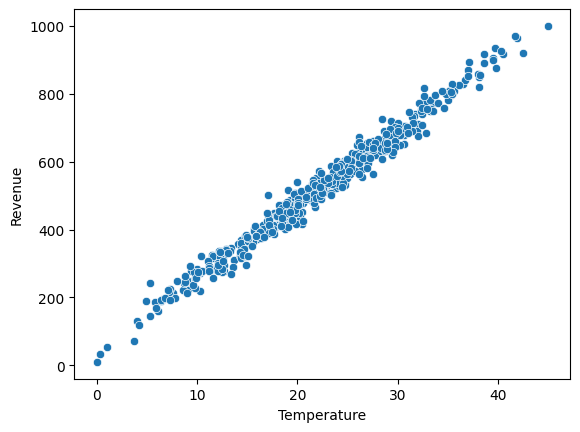

In [5]:
#Visualizacion
sns.scatterplot(data= sales_df, x="Temperature", y="Revenue")

In [6]:
#Carga de set de entrenamiento
X_train = sales_df['Temperature']
y_train = sales_df['Revenue']

In [9]:
#Crear Modelo
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units = 1, input_shape=[1]))

model.summary()

model.compile(optimizer=tf.keras.optimizers.Adam(0.1), loss='mean_squared_error'  )

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
epochs_hist = model.fit(X_train, y_train, epochs=1000)

Epoch 1/1000
16/16 [==============================] - 1s 1ms/step - loss: 266120.9375
Epoch 2/1000
16/16 [==============================] - 0s 1ms/step - loss: 227912.9844
Epoch 3/1000
16/16 [==============================] - 0s 1ms/step - loss: 193532.0312
Epoch 4/1000
16/16 [==============================] - 0s 1ms/step - loss: 163099.3906
Epoch 5/1000
16/16 [==============================] - 0s 1ms/step - loss: 136655.9062
Epoch 6/1000
16/16 [==============================] - 0s 1ms/step - loss: 113129.9609
Epoch 7/1000
16/16 [==============================] - 0s 1ms/step - loss: 93421.5469
Epoch 8/1000
16/16 [==============================] - 0s 1ms/step - loss: 76440.6797
Epoch 9/1000
16/16 [==============================] - 0s 1ms/step - loss: 61921.5430
Epoch 10/1000
16/16 [==============================] - 0s 1ms/step - loss: 49690.4805
Epoch 11/1000
16/16 [==============================] - 0s 1ms/step - loss: 39658.4141
Epoch 12/1000
16/16 [==============================] - 0s

In [15]:
keys = epochs_hist.history.keys()
print(keys)

dict_keys(['loss'])


[array([[21.521702]], dtype=float32), array([44.849888], dtype=float32)]


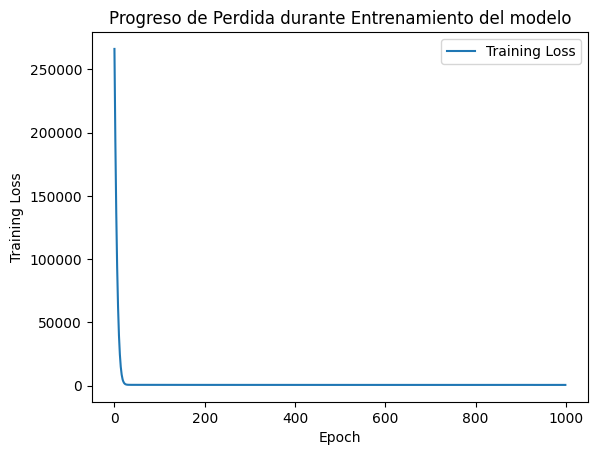

In [19]:
#Grafico de Entrenamiento del Modelo
plt.plot(epochs_hist.history['loss'])

plt.title("Progreso de Perdida durante Entrenamiento del modelo")
plt.xlabel("Epoch")
plt.ylabel("Training Loss")
plt.legend(["Training Loss"])

weights =  model.get_weights()
print(weights)

In [23]:
#Prediccion
temp = 40
Revenue = model.predict([temp])
print("La ganancia segun la Red neuronal sera de: ", Revenue)

1/1 [==============================] - 0s 27ms/step
La ganancia segun la Red neuronal sera de:  [[905.71796]]


16/16 [==============================] - 0s 1ms/step


Text(0.5, 1.0, 'Ganancia Generada vs Temperatura')

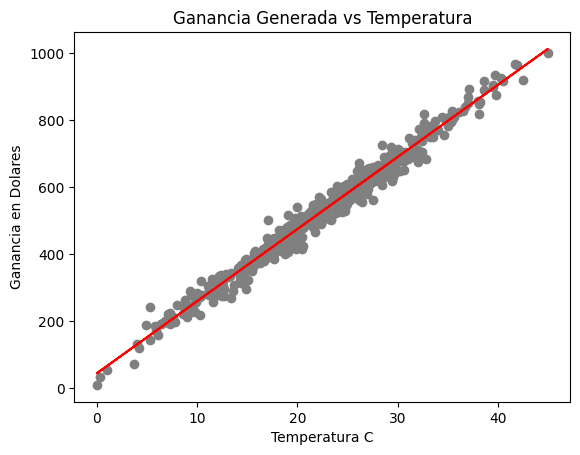

In [26]:
#Gradico de Prediccion
plt.scatter(X_train, y_train, color= "gray")
plt.plot(X_train, model.predict(X_train), color="red")
plt.ylabel("Ganancia en Dolares")
plt.xlabel("Temperatura C")
plt.title("Ganancia Generada vs Temperatura")